In [2]:
import sqlite3
import pandas as pd

testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

conn=sqlite3.connect('harth.db')

def dataOfTester(tester):
    return 'SELECT * FROM '+tester

def createDataframe(tester):
    tester_df=pd.read_sql_query(dataOfTester(tester),conn)
    if(tester=='S015' or tester=='S021'):
            tester_df=tester_df.drop(columns=['index'])
    if(tester=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
    return tester_df

tester_df = [createDataframe(tester) for tester in testers]

tester_df[0]['timestamp']=pd.to_datetime(tester_df[0]['timestamp'])
timedelta_list = []

for df in tester_df:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    timedelta = df['timestamp'].iloc[1] - df['timestamp'].iloc[0]
    timedelta_list.append(timedelta)

print(timedelta_list)
for i in range(len(testers)):
    tester_df[i]['timestamp']=pd.to_datetime(tester_df[i]['timestamp'])
    interval=timedelta_list[i]
    tester_df[i]['sample']=(tester_df[i]['timestamp']-tester_df[i]['timestamp'].iloc[0])//interval
    tester_df[i].drop(columns=['timestamp'],inplace=True)



      
# tester_df[0]['sample']=(tester_df[0]['timestamp']-tester_df[0]['timestamp'].iloc[0])//interval
# tester_df[0].drop(columns=['timestamp'],inplace=True)



tester_df[4].head()



[Timedelta('0 days 00:00:00.010000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.019999995'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000')]


,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,sample
0,-3.810360,0.165219,-0.663742,-0.919657,-0.759899,0.239633,6,0
1,-0.188988,-0.235452,-1.343093,-0.137463,-0.852652,-1.423640,6,1
2,-0.060000,0.008919,-0.876293,1.347957,-0.642281,-2.081678,6,2
3,-1.222393,0.028038,-0.460220,1.063477,-2.840740,-0.143171,6,3
4,-1.026113,-0.170239,-0.163068,-3.239610,0.924564,-0.720399,6,4


In [3]:
for i in tester_df:
    i.info()

for i in tester_df:
    print(i.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408709 entries, 0 to 408708
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   back_x   408709 non-null  float64
 1   back_y   408709 non-null  float64
 2   back_z   408709 non-null  float64
 3   thigh_x  408709 non-null  float64
 4   thigh_y  408709 non-null  float64
 5   thigh_z  408709 non-null  float64
 6   label    408709 non-null  int64  
 7   sample   408709 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 24.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418989 entries, 0 to 418988
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   back_x   418989 non-null  float64
 1   back_y   418989 non-null  float64
 2   back_z   418989 non-null  float64
 3   thigh_x  418989 non-null  float64
 4   thigh_y  418989 non-null  float64
 5   thigh_z  418989 non-null  float64
 6   label    418989 non-nu

In [20]:
#lets create the rolling window
rolling_window=[0]*len(tester_df)
for i in range(len(tester_df)):
    rolling_window[i] = tester_df[i].iloc[:,:-2].rolling(window=10,center=True).mean()
    rolling_window[i]['label']=tester_df[i]['label']
    rolling_window[i].bfill(limit=5, inplace=True)
    rolling_window[i].ffill(limit=5, inplace=True)

for i in rolling_window:
    print(i.tail(10))





          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
408699 -0.718071  0.035292 -0.691135  0.063827  0.068942  1.002220      7
408700 -0.716116  0.034737 -0.691002  0.073453  0.069298  1.001427      7
408701 -0.717247  0.034221 -0.689879  0.061229  0.068797  1.003284      7
408702 -0.715693  0.034660 -0.691207  0.077474  0.069538  1.001981      7
408703 -0.717548  0.034044 -0.689069  0.054243  0.068358  1.003505      7
408704 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408705 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408706 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408707 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408708 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
418979 -0.990182 -0.169308 -0.198136 -0.988800 -0.129428 -0.075978      3
418980 -0.986373 -0.163015 -0.199718 -

In [25]:
#unite all the dataframes inside the rolling_window list

unified_df=pd.concat(rolling_window,ignore_index=True)


,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
6461323,-0.991919,-0.072485,-0.209595,-0.97815,-0.193555,0.115332,3
6461324,-0.991919,-0.072485,-0.209595,-0.97815,-0.193555,0.115332,3
6461325,-0.991919,-0.072485,-0.209595,-0.97815,-0.193555,0.115332,3
6461326,-0.991919,-0.072485,-0.209595,-0.97815,-0.193555,0.115332,3
6461327,-0.991919,-0.072485,-0.209595,-0.97815,-0.193555,0.115332,3


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=unified_df.drop(columns=['label'])
Y=unified_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=4)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=4, random_state=42)

In [31]:
#48min
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

rfpredicts=rf.predict(X_test)
rf_report=classification_report(y_test,rfpredicts)
rf_accur=accuracy_score(y_test,rfpredicts)
rf_score=rf.score(X_train,y_train)
print("RF report:",rf_report,"RF accuracy:",rf_accur,"RF training:",rf_score)

RF report:               precision    recall  f1-score   support

           1       0.86      0.94      0.90    359238
           2       0.95      0.91      0.93     87592
           3       0.75      0.58      0.65     76676
           4       0.80      0.56      0.66     22897
           5       0.75      0.33      0.46     20140
           6       0.92      0.93      0.93    222327
           7       1.00      1.00      1.00    870840
           8       1.00      1.00      1.00    128693
          13       0.93      0.97      0.95    118360
          14       0.89      0.83      0.86     16772
         130       0.87      0.80      0.83     12493
         140       0.90      0.77      0.83      2371

    accuracy                           0.94   1938399
   macro avg       0.88      0.80      0.83   1938399
weighted avg       0.94      0.94      0.94   1938399
 RF accuracy: 0.9419820171182507 RF training: 0.9999969046606745


In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [30]:
predicts_gnb=gnb.predict(X_test)
gnb_report=classification_report(y_test,predicts_gnb)
gnb_accur=accuracy_score(y_test,predicts_gnb)
gnb_score=gnb.score(X_train,y_train)
print("GNB estim report: \n",gnb_report,'\n',"GNB estim accuracy:",gnb_accur,'\n',"GNB training:",gnb_score)

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GNB estim report: 
               precision    recall  f1-score   support

           1       0.73      0.65      0.69    359238
           2       0.71      0.64      0.68     87592
           3       0.30      0.06      0.10     76676
           4       0.05      0.00      0.00     22897
           5       0.00      0.00      0.00     20140
           6       0.55      0.92      0.68    222327
           7       0.98      0.98      0.98    870840
           8       0.94      1.00      0.97    128693
          13       0.70      0.77      0.74    118360
          14       0.46      0.30      0.37     16772
         130       0.26      0.02      0.03     12493
         140       0.17      0.01      0.02      2371

    accuracy                           0.81   1938399
   macro avg       0.49      0.45      0.44   1938399
weighted avg       0.79      0.81      0.79   1938399
 
 GNB estim accuracy: 0.8124091066906246 
 GNB training: 0.8127140620602269


In [32]:
#24 min
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=1000,activation='tanh',random_state=42,early_stopping=True)
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', early_stopping=True, max_iter=1000,
              random_state=42)

In [33]:
from sklearn.metrics import accuracy_score,classification_report
mlppredicts=mlp.predict(X_test)
mlp_report=classification_report(y_test,mlppredicts)
mlp_accur=accuracy_score(y_test,mlppredicts)
mlp_score=mlp.score(X_train,y_train)
print("MLP report:",mlp_report,"MLP accuracy:",mlp_accur,"MLP training:",mlp_score)

MLP report:               precision    recall  f1-score   support

           1       0.82      0.86      0.84    359238
           2       0.90      0.84      0.87     87592
           3       0.44      0.25      0.32     76676
           4       0.54      0.29      0.38     22897
           5       0.57      0.13      0.21     20140
           6       0.76      0.89      0.82    222327
           7       1.00      1.00      1.00    870840
           8       1.00      1.00      1.00    128693
          13       0.87      0.94      0.90    118360
          14       0.74      0.66      0.70     16772
         130       0.63      0.55      0.59     12493
         140       0.62      0.51      0.56      2371

    accuracy                           0.90   1938399
   macro avg       0.74      0.66      0.68   1938399
weighted avg       0.89      0.90      0.89   1938399
 MLP accuracy: 0.895525121504912 MLP training: 0.8961325724989271


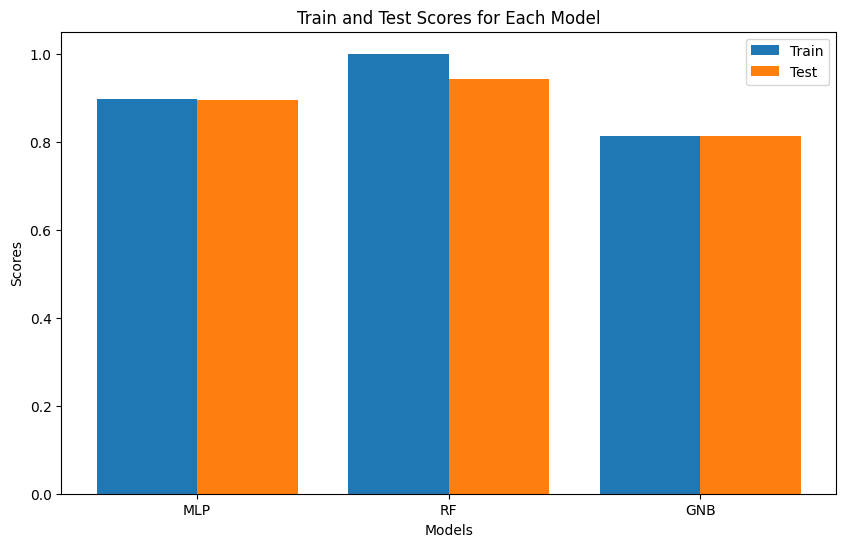

In [34]:
from matplotlib import pyplot as plt
import numpy as np
models=['MLP','RF','GNB']
accuracies=[mlp_accur,rf_accur,gnb_accur]
trainingscores=[mlp_score,rf_score,gnb_score]

# Plot
plt.figure(figsize=(10, 6))
x=np.arange(len(accuracies))

plt.bar(x-0.2, trainingscores,0.4, label='Train')
plt.bar(x+0.2, accuracies,0.4,label='Test')
plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train and Test Scores for Each Model')
plt.legend()
plt.show()